<a href="https://colab.research.google.com/github/LeonardoClemente23/quarentenadados-Alura/blob/main/Aula_01_desafios_QuarentenaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importa os módulos necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# lê a base de dados
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")

# muda o título das colunas
filmes.columns = ["filmeId", "titulo", "generos"]

# mostra as primeiras linhas do dataframe
filmes.head()


,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()


,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.


In [ ]:
# tira a média das notas por filme
media_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()

# junta os filmes as suas respectivas médias.
filmes_com_media = filmes.join(media_por_filme,on = "filmeId")
filmes_com_media = filmes_com_media.rename(columns={'nota': 'nota_media'})
filmes_com_media.sort_values(by="nota_media",ascending=False)


,filmeId,titulo,generos,nota_media
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


In [ ]:
# verifica os valores nulos. Retorna uma serie booleana
selecao = filmes_com_media["nota_media"].isnull()

# pega apenas os nulos
filmes_sem_nota = filmes_com_media[selecao]

In [ ]:
total_filmes_sem_nota = filmes_sem_nota["titulo"].count()
print(f"Total de filmes sem nota: {total_filmes_sem_nota}")
print()
print("Filmes:")
for ind in filmes_sem_nota.index:
  print(filmes_sem_nota["titulo"][ind])


Total de filmes sem nota: 18

Filmes:
Innocents, The (1961)
Niagara (1953)
For All Mankind (1989)
Color of Paradise, The (Rang-e khoda) (1999)
I Know Where I'm Going! (1945)
Chosen, The (1981)
Road Home, The (Wo de fu qin mu qin) (1999)
Scrooge (1970)
Proof (1991)
Parallax View, The (1974)
This Gun for Hire (1942)
Roaring Twenties, The (1939)
Mutiny on the Bounty (1962)
In the Realms of the Unreal (2004)
Twentieth Century (1934)
Call Northside 777 (1948)
Browning Version, The (1951)
Chalet Girl (2011)


## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [ ]:
# Já fiz no desafio 1

## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [ ]:
notas_por_filme = avaliacoes.groupby("filmeId")["nota"].count()
filmes_com_media_e_total = filmes_com_media.join(notas_por_filme, on = "filmeId")

filmes_com_media_e_total = filmes_com_media_e_total.rename(columns={'nota': 'total_avaliacoes'})
filmes_com_media_e_total


,filmeId,titulo,generos,nota_media,total_avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1.0
9739,193585,Flint (2017),Drama,3.500000,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1.0


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [ ]:
filmes_com_media_e_total["nota_media"] = round(filmes_com_media_e_total["nota_media"],2)
filmes_com_media_e_total

,filmeId,titulo,generos,nota_media,total_avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [ ]:
# Maneira da Alura
# Cria um dataframe com as ocorrências como nome das colunas com 0's e 1's. 
# 1 se tem, 0 se não tem
generos_df = filmes_com_media_e_total.generos.str.get_dummies('|')

# Pega os nomes das colunas
generos = generos_df.columns.to_list()
generos


['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [ ]:
# Minha maneira
def first_composto(dataframe, coluna, part):
  """
  -> Para o caso em que um dataframe aprensente mais de um elemento por linha na
  coluna indicada. Devolve uma série com a primeira ocorrência de cada elemento 

  -> parâmetros:
  
          dataframe: o dataframe a ser estudado
          coluna: string do nome coluna com mais de um elemento por linha
          part: a string de separação
  -> return:
          uma série com a primeira ocorrência dos elementos
  """
  elementos_separados = dataframe[coluna].str.split(part)
  lista_elementos_unico = []

  for ind in elementos_separados:
    for elem in ind:
      if elem not in lista_elementos_unico:
        lista_elementos_unico.append(elem)
  
  return pd.DataFrame(lista_elementos_unico)


In [ ]:
# aplica-se a função fisrt_composto
gen_df_unico = first_composto(filmes, "generos", "|")
gen_df_unico.columns = ["generos"]

# impressão da mensagem
print("gêneros dos filmes presentes:")
for gen in gen_df_unico["generos"]:
  print(f"{gen}; ")

gêneros dos filmes presentes:
Adventure; 
Animation; 
Children; 
Comedy; 
Fantasy; 
Romance; 
Drama; 
Action; 
Crime; 
Thriller; 
Horror; 
Mystery; 
Sci-Fi; 
War; 
Musical; 
Documentary; 
IMAX; 
Western; 
Film-Noir; 
(no genres listed); 


## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

In [ ]:
# Maneira da Alura
total_filmes_por_genero = filmes_com_media_e_total.generos.str.get_dummies().sum()
total_filmes_por_genero

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [ ]:
# Minha maneira
# Separa os gêneros de cada linha
generos_separados = filmes["generos"].str.split("|")
lista_genero = []

# Monta a lista com todos os gêneros que aparecem no dataframe
for filme in generos_separados:
  for genero in filme:
    lista_genero.append(genero)

# Transforma a lista em um dataframe
df_lista_genero = pd.DataFrame(data=lista_genero)
df_lista_genero.columns = ["qtdeGeneros"]

# Conta as vezes em que cada gênero aparece 
gen_serie = df_lista_genero.groupby("qtdeGeneros")["qtdeGeneros"].count()

In [ ]:
# Junta um dataframe no outro usando o método .join()
df_Generos = gen_df_unico.join(gen_serie, on="generos")

## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

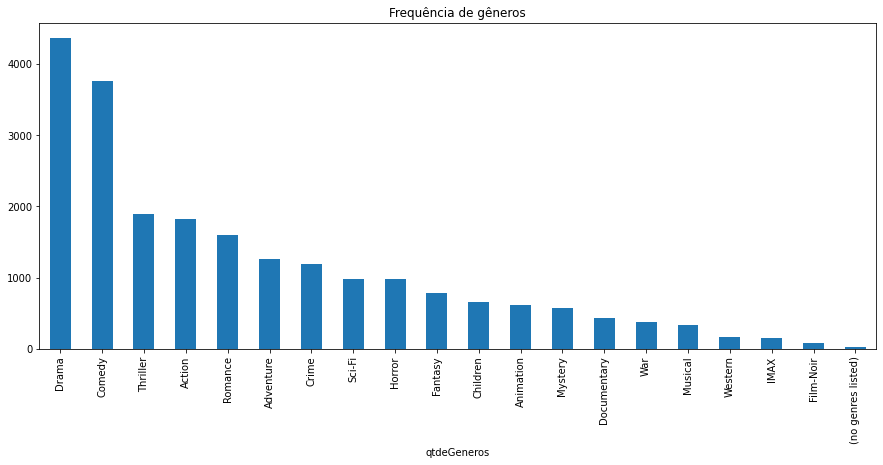

In [ ]:
gen_serie.sort_values(ascending=False).plot(kind="bar", figsize=(15,6),title="Frequência de gêneros")